In [1]:
# importing needed libraries for data 
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

df = pd.DataFrame(df)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Question 12

From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [3]:
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)
#simple_linear_reg_df

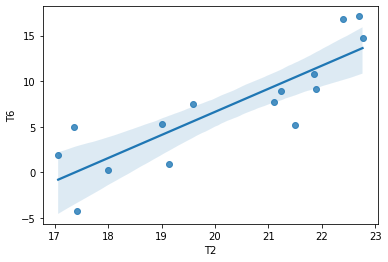

In [4]:
sns.regplot(x='T2', y='T6', data=simple_linear_reg_df);

In [5]:
from sklearn.metrics import r2_score
x = simple_linear_reg_df['T2']
y = simple_linear_reg_df['T6']
r2_score = r2_score(x, y)
round(r2_score, 2)

-46.24

Question 13

Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [6]:
# Dropping the lights column and date column

df.drop(['lights'], axis=1,inplace=True)
df.drop(['date'], axis=1, inplace=True)

In [7]:
#Applying MinMaxScaler to scale the features to normalize

#importing the library
from sklearn.preprocessing import MinMaxScaler

#declaring the scaler and fit into the data
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [8]:
#Spliting the data into test and train dataset

features = normalized_features.drop(['Appliances'], axis=1)
target = normalized_features['Appliances']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [9]:
# importing the linearregression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# fitting the model to the training dataset
linear_model.fit(x_train, y_train)

# deriving the predictions
predicted_values = linear_model.predict(x_test)

In [10]:
# Mean absolute error to 2 decimal places
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
print(f' The MEAN ABSOLUTE ERROR is {round(mae, 2)}')

 The MEAN ABSOLUTE ERROR is 0.05


Question 14

What is the Residual Sum of Squares (in two decimal places)?

In [11]:
# Residual Sum of Squares to 2 decimal places
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
print(f' The RESIDUAL SUM OF SQUARES is {round(rss, 2)}')

 The RESIDUAL SUM OF SQUARES is 45.35


Question 15

What is the Root Mean Squared Error (in three decimal places)?

In [13]:
# Root Mean Square Error to 3 decimal places
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print(f' The ROOT MEAN SQUARED ERROR is {round(rmse, 3)}')

 The ROOT MEAN SQUARED ERROR is 0.088


Question 16

What is the Coefficient of Determination (in two decimal places)?

In [14]:
# R-squared or coefficient of determination to 2 decimal places
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
print(f' The COEFFICIENT OF DETERMINATION is {round(r2_score, 2)}')

 The COEFFICIENT OF DETERMINATION is 0.15


Question 17

Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [23]:
weights = pd.Series(linear_model.coef_, x_train.columns).sort_values()
weights_df = pd.DataFrame(weights).reset_index()
weights_df['weights'] = weights_df[0]
weights_df.drop([0], axis=1,inplace=True)
weights_df

,index,weights
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [29]:
print(weights_df['weights'].min())
print(weights_df['weights'].max())

print(f" Hence the features that have the lowest and highest weights respectively are RH_1 and RH_2")

-0.4566979483385004
0.5535465998386391
 Hence the features that have the lowest and highest weights respectively are RH_1 and RH_2


Question 18

Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [41]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train,y_train)
y_ = ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_))
print(f' The ROOT MEAN SQUARED ERROR is {round(rmse, 3)}')

 The ROOT MEAN SQUARED ERROR is 0.088


In [43]:
# Question 18 Answer
#Hence, there is no change

Question 19

Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?







In [31]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [37]:
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

#ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
lasso_weights_df = pd.DataFrame(lasso_weights_df)
print(lasso_weights_df.notnull().sum())
print(f'Hence 26 features has non-zero')

Features        26
Lasso_weight    26
dtype: int64
Hence 26 features has non-zero


Question 20

What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [54]:
f_x = lasso_reg.predict(x_test) 
rmse = np.sqrt(mean_squared_error(y_test, f_x))
rmse

0.09358170467245137